<a href="https://colab.research.google.com/github/oakthyago/DC12-A-Solution-for-Managing-Electrical-Contract-Demand-in-Brazil/blob/main/Notas_Final_2_multiplas_notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pdfplumber
!pip install pandas

**This project focuses on extracting structured information from PDF files that contain tables, with the goal of transforming this data into a usable dataset. The process is made feasible due to the regular format of the tables across the PDF pages, where a predefined structure and positioning can be identified. Additionally, it's worth noting that the original data was likely sourced from databases, which contributes to the consistency in the format.**

In [6]:
import pdfplumber
import pandas as pd
import re
import os

def extrair_tabelas_pdf(caminho_pdf):
    with pdfplumber.open(caminho_pdf) as pdf:
        todas_tabelas = []
        dados_produtos_completo = ""

        # Expressão regular para capturar o bloco de 'DADOS DOS PRODUTOS / SERVIÇOS'
        padrao = r"DADOS DOS PRODUTOS / SERVIÇOS(.*?)(?=DADOS ADICIONAIS)"
        padrao_alternativo = r"DADOS DOS PRODUTOS / SERVIÇOS(.*)"

        # Itera sobre todas as páginas do PDF
        for numero_pagina, pagina in enumerate(pdf.pages, start=1):
            texto_pagina = pagina.extract_text()

            # Primeira tentativa: captura entre 'DADOS DOS PRODUTOS / SERVIÇOS' e 'DADOS ADICIONAIS'
            dados_produtos = re.search(padrao, texto_pagina, re.DOTALL)

            if dados_produtos:
                dados_produtos_completo += dados_produtos.group(0) + "\n"
            else:
                # Segunda tentativa: captura tudo depois de 'DADOS DOS PRODUTOS / SERVIÇOS' se 'DADOS ADICIONAIS' não for encontrado
                dados_produtos_fallback = re.search(padrao_alternativo, texto_pagina, re.DOTALL)

                if dados_produtos_fallback:
                    dados_produtos_completo += dados_produtos_fallback.group(0) + "\n"
                else:
                    print(f"Seção de dados do produto não encontrada na página {numero_pagina}.")

            # Agora, tenta extrair as tabelas da página dentro do bloco extraído
            if dados_produtos or dados_produtos_fallback:
                tabelas = pagina.extract_tables()

                # Se houver tabelas na página, adiciona à lista
                if tabelas:
                    for tabela in tabelas:
                        df = pd.DataFrame(tabela[1:], columns=tabela[0])  # Converte a tabela em DataFrame
                        todas_tabelas.append(df)

        return todas_tabelas, dados_produtos_completo

def processar_varios_pdfs(diretorio):
    resultados = {}

    # Itera sobre todos os arquivos PDF no diretório
    for arquivo in os.listdir(diretorio):
        if arquivo.endswith(".pdf"):
            caminho_pdf = os.path.join(diretorio, arquivo)
            tabelas, dados_textuais = extrair_tabelas_pdf(caminho_pdf)
            resultados[arquivo] = {
                "tabelas": tabelas,
                "dados_textuais": dados_textuais
            }

    return resultados

# Diretório onde as notas fiscais estão localizadas
diretorio_notas = '/content/drive/MyDrive/120/12'  # Substitua pelo caminho correto

# Processar todos os PDFs no diretório e obter os resultados
resultados = processar_varios_pdfs(diretorio_notas)

# Exibir os resultados para cada nota fiscal
#for arquivo, conteudo in resultados.items():
 #   print(f"\nDados extraídos da nota {arquivo}:\n")

    # Exibir texto extraído
  #  print("Texto extraído:\n")
   # print(conteudo["dados_textuais"])

    # Exibir tabelas extraídas
   # for idx, tabela in enumerate(conteudo["tabelas"]):
    #    print(f"\nTabela {idx + 1}:\n")
     #   print(tabela)

In [126]:
df_concat = pd.DataFrame()

# Itera sobre os resultados de todos os PDFs
for arquivo, conteudo in resultados.items():
    print(f"Processando arquivo: {arquivo}")

    # Itera sobre as tabelas no conteúdo de cada PDF
    for idx, tabela in enumerate(conteudo["tabelas"]):
        # Verifica se 'CÓDIGO PRODUTO' está nas colunas
        if 'CÓDIGO PRODUTO' in tabela.columns:
            # Encontra o índice da coluna 'CÓDIGO PRODUTO'
            idx_codigo_produto = tabela.columns.get_loc('CÓDIGO PRODUTO')

            # Define as próximas 10 colunas após 'CÓDIGO PRODUTO'
            colunas_desejadas = tabela.columns[idx_codigo_produto:idx_codigo_produto + 10]

            # Filtra as colunas desejadas
            df_filtered = tabela[colunas_desejadas]

            # Renomeia as colunas para A, B, C, etc.
            df_filtered.columns = [chr(65 + i) for i in range(len(df_filtered.columns))]

            # Se for a primeira tabela, copia para o df_concat, caso contrário, concatena
            if df_concat.empty:
                df_concat = df_filtered.copy()
            else:
                df_concat = pd.concat([df_concat, df_filtered], ignore_index=True)

# Exibe o DataFrame concatenado
df_concat

Processando arquivo: _JUNTO (13).pdf
Processando arquivo: _JUNTO (1).pdf
Processando arquivo: _JUNTO (11).pdf
Processando arquivo: _JUNTO (10).pdf
Processando arquivo: _JUNTO (9).pdf
Processando arquivo: _JUNTO (7).pdf
Processando arquivo: _JUNTO (6).pdf
Processando arquivo: _JUNTO (4).pdf
Processando arquivo: _JUNTO (8).pdf
Processando arquivo: _JUNTO (5).pdf
Processando arquivo: _JUNTO.pdf
Processando arquivo: _JUNTO (3).pdf
Processando arquivo: _JUNTO (2).pdf
Processando arquivo: _JUNTO (18).pdf
Processando arquivo: _JUNTO (17).pdf
Processando arquivo: _JUNTO (16).pdf
Processando arquivo: _JUNTO (15).pdf
Processando arquivo: _JUNTO (14).pdf
Processando arquivo: _JUNTO (12).pdf


A                                                  B         C  \
0         27609  0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...  64029990   
1         27611  0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...  64029990   
2         27588  0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...  64022000   
3         27910  06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...  64022000   
4         27912  06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...  64022000   
...         ...                                                ...       ...   
15639  23557015  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....  64029990   
15640  23557019  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....  64029990   
15641  23557023  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....  64029990   
15642  23557025  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....  64029990   
15643                                                                          

         D     E    F        G               H                  I       J  
0      000  6101   PR  12,0000  35,6500 427,80  0,00 427,80 29,94          
1      000  6101   PR  12,0000  35,6500 427,80  0,00 427,80 29,94          
2      000  6101   PR  12,0000  21,3900 256,68  0,00 256,68 17,97          
3      000  6101   PR  12,0000  35,6500 427,80  0,00 427,80 29,95          
4      000  6101   PR  12,0000  35,6500 427,80  0,00 427,80 29,95          
...    ...   ...  ...      ...             ...                ...     ...  
15639  500  6101  PAR   3,0000            43,0          300 129,0  9 0,00  
15640  500  6101  PAR   3,0000            43,0          300 129,0  9 0,00  
15641  500  6101  PAR   2,0000            43,0           300 86,0  6 0,00  
15642  500  6101  PAR   1,0000            43,0           300 43,0  3 0,00  
15643                                                                      

[15644 rows x 10 columns]

**Starting of the treatment**





 we need the Quantity and the unitary value in a float number to use them in the future needs such as know the total cust of this invoice


In [131]:
# prompt: df_concat[df_concat['G'] == 500]

df_concat[df_concat['G'] == '500']


Empty DataFrame
Columns: [A, B, C, D, E, F, G, H, I, J]
Index: []

In [125]:
df_concat["G"].value_counts().sort_index()


G
0      1302
1      4388
2      5044
3      2278
4       851
5       300
6       492
7         6
8       102
9        15
10       34
12      703
13        4
14        3
15       17
16        3
18        5
19        3
20        5
21        1
24       53
26        1
30        3
36       15
40        2
48        2
60        2
72        1
78        1
144       4
165       1
200       1
425       1
500       1
Name: count, dtype: int64

G
0    15644
Name: count, dtype: int64

In [78]:
# prompt: df_concat[G] == 500 show line

df_concat[df_concat['G'] == 144]


Empty DataFrame
Columns: [A, B, C, D, E, F, G, H, I, J]
Index: []

The strip() method is applied to each cell to generate a boolean matrix that identifies rows containing empty or whitespace-only strings (''). This matrix will be used to drop those rows from the dataset, ensuring that only meaningful data remains.

In [9]:
# Função para aplicar o strip e verificar se a célula está vazia
def is_empty(cell):
    return str(cell).strip() == ''

# Aplicar a função ao DataFrame usando applymap, que aplica a função a cada célula
boolean_matrix = df_concat.applymap(is_empty)

# Exibir a matriz booleana
boolean_matrix

<ipython-input-9-e1371913c4dc>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  boolean_matrix = df_concat.applymap(is_empty)


CÓDIGO PRODUTO  DESCRIÇÃO DO PRODUTO / SERVIÇO  NCM/SH  O/CST   CFOP  \
0               False                           False   False  False  False   
1               False                           False   False  False  False   
2               False                           False   False  False  False   
3               False                           False   False  False  False   
4               False                           False   False  False  False   
...               ...                             ...     ...    ...    ...   
15639           False                           False   False  False  False   
15640           False                           False   False  False  False   
15641           False                           False   False  False  False   
15642           False                           False   False  False  False   
15643            True                            True    True   True   True   

          UN  QUANT  VALOR VALOR VA\nUNIT TOTAL D  \
0      False  False                         False   
1      False  False                         False   
2      False  False                         False   
3      False  False                         False   
4      False  False                         False   
...      ...    ...                           ...   
15639  False  False                         False   
15640  False  False                         False   
15641  False  False                         False   
15642  False  False                         False   
15643   True   True                         False   

       VALOR VALOR VALOR\nUNIT TOTAL DESC  VALOR VALOR V\nUNIT TOTAL D  ...  \
0                                   False                        False  ...   
1                                   False                        False  ...   
2                                   False                        False  ...   
3                                   False                        False  ...   
4                                   False                        False  ...   
...                                   ...                          ...  ...   
15639                               False                        False  ...   
15640                               False                        False  ...   
15641                               False                        False  ...   
15642                               False                        False  ...   
15643                               False                        False  ...   

       VALO\nUNIT  VALOR VALOR VALOR B\nUNIT TOTAL DESC  \
0           False                                 False   
1           False                                 False   
2           False                                 False   
3           False                                 False   
4           False                                 False   
...           ...                                   ...   
15639       False                                 False   
15640       False                                 False   
15641       False                                 False   
15642       False                                 False   
15643        True                                 False   

       VALOR VALOR VAL\nUNIT TOTAL DE  VALOR UNIT VAL  VALOR UNIT VALO  \
0                               False           False            False   
1                               False           False            False   
2                               False           False            False   
3                               False           False            False   
4                               False           False            False   
...                               ...             ...              ...   
15639                           False           False            False   
15640                           False           False            False   
15641                           False           False            False   
15642                  

In [10]:
# prompt: column boolean_matrix[CÓDIGO PRODUTO]  and then drop the line wicth is true in df_concat

# Seleciona a coluna 'CÓDIGO PRODUTO' da matriz booleana
codigo_produto_empty = boolean_matrix['CÓDIGO PRODUTO']

# Remove as linhas onde a coluna 'CÓDIGO PRODUTO' é True (indicando que a célula está vazia)
df_concat = df_concat[~codigo_produto_empty]


In [11]:
df_concat

CÓDIGO PRODUTO                     DESCRIÇÃO DO PRODUTO / SERVIÇO  \
0              27609  0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...   
1              27611  0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...   
2              27588  0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...   
3              27910  06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...   
4              27912  06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...   
...              ...                                                ...   
15638       23557013  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....   
15639       23557015  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....   
15640       23557019  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....   
15641       23557023  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....   
15642       23557025  SAPATO CASUAL FEM. DE USO COMUM C/\nSOLA SINT....   

         NCM/SH O/CST  CFOP   UN    QUANT VALOR VALOR VA\nUNIT TOTAL D  \
0      64029990   000  6101   PR  12,0000               35,6500 427,80   
1      64029990   000  6101   PR  12,0000               35,6500 427,80   
2      64022000   000  6101   PR  12,0000               21,3900 256,68   
3      64022000   000  6101   PR  12,0000               35,6500 427,80   
4      64022000   000  6101   PR  12,0000               35,6500 427,80   
...         ...   ...   ...  ...      ...                          ...   
15638  64029990   500  6101  PAR   2,0000                          NaN   
15639  64029990   500  6101  PAR   3,0000                          NaN   
15640  64029990   500  6101  PAR   3,0000                          NaN   
15641  64029990   500  6101  PAR   2,0000                          NaN   
15642  64029990   500  6101  PAR   1,0000                          NaN   

      VALOR VALOR VALOR\nUNIT TOTAL DESC VALOR VALOR V\nUNIT TOTAL D  ...  \
0                                    NaN                         NaN  ...   
1                                    NaN                         NaN  ...   
2                                    NaN                         NaN  ...   
3                                    NaN                         NaN  ...   
4                                    NaN                         NaN  ...   
...                                  ...                         ...  ...   
15638                                NaN                         NaN  ...   
15639                                NaN                         NaN  ...   
15640                                NaN                         NaN  ...   
15641                                NaN                         NaN  ...   
15642                                NaN                         NaN  ...   

      VALO\nUNIT VALOR VALOR VALOR B\nUNIT TOTAL DESC  \
0            NaN                                  NaN   
1            NaN                                  NaN   
2            NaN                                  NaN   
3            NaN                                  NaN   
4            NaN                                  NaN   
...          ...                                  ...   
15638       43,0                                  NaN   
15639       43,0                                  NaN   
15640       43,0                                  NaN   
15641       43,0                                  NaN   
15642       43,0                                  NaN   

      VALOR VALOR VAL\nUNIT TOTAL DE VALOR UNIT VAL VALOR UNIT VALO  \
0                                NaN            NaN             NaN   
1                                NaN            NaN             NaN   
2                                NaN            NaN             NaN   
3                                NaN            NaN             NaN   
4                                NaN            NaN             NaN   
...                              ...            ...             ...   
15638                            NaN            NaN             NaN   
15639                            NaN  

In [12]:
# prompt: df = df_concat

df = df_concat


In [31]:
df_concat = df

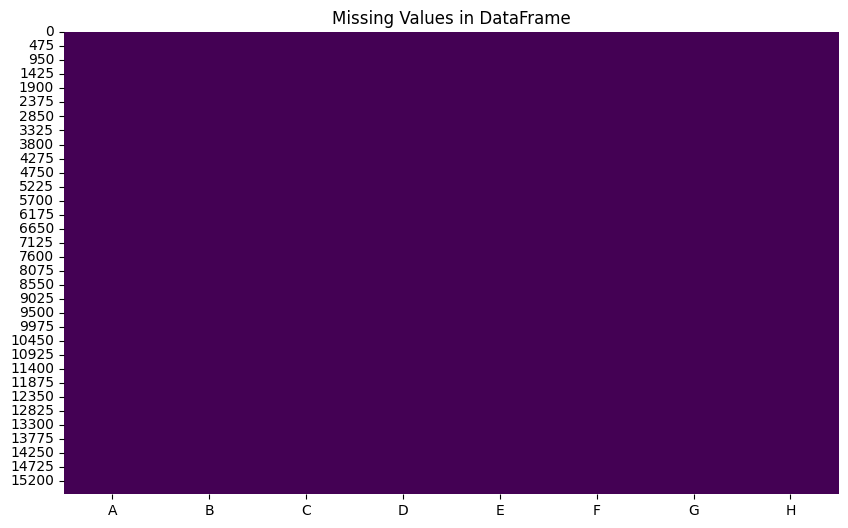

In [57]:
# prompt: df_concat seaborn plot of Nan on the df

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_concat.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in DataFrame')
plt.show()


Notice that on the process Valor Unit was split in two columns but can be reorganizaed


In [14]:
# prompt: df_concat columns name

df_concat.columns


Index(['CÓDIGO PRODUTO', 'DESCRIÇÃO DO PRODUTO / SERVIÇO', 'NCM/SH', 'O/CST',
       'CFOP', 'UN', 'QUANT', 'VALOR VALOR VA\nUNIT TOTAL D',
       'VALOR VALOR VALOR\nUNIT TOTAL DESC', 'VALOR VALOR V\nUNIT TOTAL D',
       'VALOR\nUNIT', 'O/CSOSN', 'VALOR VALOR V\nUNIT TOTAL',
       'VALOR VALOR VA\nUNIT TOTAL DE',
       'VALOR VALOR VALOR B.\nUNIT TOTAL DESC I', 'VALOR VALOR\nUNIT TOTAL',
       'VALOR VALOR VALO\nUNIT TOTAL DESC',
       'VALOR VALOR VALOR B.C\nUNIT TOTAL DESC IC', 'VALO\nUNIT',
       'VALOR VALOR VALOR B\nUNIT TOTAL DESC',
       'VALOR VALOR VAL\nUNIT TOTAL DE', 'VALOR UNIT VAL', 'VALOR UNIT VALO',
       'VALOR UNIT VALOR TOTA', 'VALOR VALOR VAL\nUNIT TOTAL DES',
       'VALOR V\nUNIT T', 'VALOR VALOR VALO\nUNIT TOTAL DES',
       'VALOR V\nUNIT TO'],
      dtype='object')

In [19]:
# Define the columns that you want to merge
columns_to_merge = ['VALOR VALOR VA\nUNIT TOTAL D', 'VALOR VALOR VALOR\nUNIT TOTAL DESC',
                    'VALOR VALOR V\nUNIT TOTAL D', 'VALOR\nUNIT', 'O/CSOSN',
                    'VALOR VALOR V\nUNIT TOTAL', 'VALOR VALOR VA\nUNIT TOTAL DE',
                    'VALOR VALOR VALOR B.\nUNIT TOTAL DESC I', 'VALOR VALOR\nUNIT TOTAL',
                    'VALOR VALOR VALO\nUNIT TOTAL DESC', 'VALOR VALOR VALOR B.C\nUNIT TOTAL DESC IC',
                    'VALO\nUNIT', 'VALOR VALOR VALOR B\nUNIT TOTAL DESC',
                    'VALOR VALOR VAL\nUNIT TOTAL DE', 'VALOR UNIT VAL', 'VALOR UNIT VALO',
                    'VALOR UNIT VALOR TOTA', 'VALOR VALOR VAL\nUNIT TOTAL DES',
                    'VALOR V\nUNIT T', 'VALOR VALOR VALO\nUNIT TOTAL DES', 'VALOR V\nUNIT TO']

# Merge the columns by applying forward fill
df_concat['Merged_Column'] = df_concat[columns_to_merge].bfill(axis=1).iloc[:, 0]

# Drop the individual columns after merging
df_concat = df_concat.drop(columns=columns_to_merge)


<ipython-input-19-0222399c31a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Merged_Column'] = df_concat[columns_to_merge].bfill(axis=1).iloc[:, 0]


In [32]:
# prompt: adjust df_concat['Merged_Column'] = df_concat[columns_to_merge].bfill(axis=1).iloc[:, 0] to get any value not Nan from all the columns in  columns_to_merge make sure all columns after df_concat["unit'] are in the set some colums are this way [35,6500 427,80" need to get the fist number in this case 35,65

# Define a function to extract the first number from a string
def extract_first_number(value):
  if pd.isna(value):
    return value
  else:
    try:
      # Split the string by spaces and take the first part
      parts = str(value).split(" ")
      first_part = parts[0]
      # Remove any non-numeric characters and convert to float
      return float(first_part.replace(",", ""))
    except:
      return value

# Apply the function to all columns in columns_to_merge
df_concat['Merged_Column'] = df_concat[columns_to_merge].applymap(extract_first_number).fillna(method='bfill', axis=1).iloc[:, 0]


<ipython-input-32-ba94c9dcc322>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_concat['Merged_Column'] = df_concat[columns_to_merge].applymap(extract_first_number).fillna(method='bfill', axis=1).iloc[:, 0]
<ipython-input-32-ba94c9dcc322>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_concat['Merged_Column'] = df_concat[columns_to_merge].applymap(extract_first_number).fillna(method='bfill', axis=1).iloc[:, 0]
<ipython-input-32-ba94c9dcc322>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Merged_Column'] = df_concat[columns_to_merge].applymap(extract_first_number).fillna(method='bfill', axis=1).i

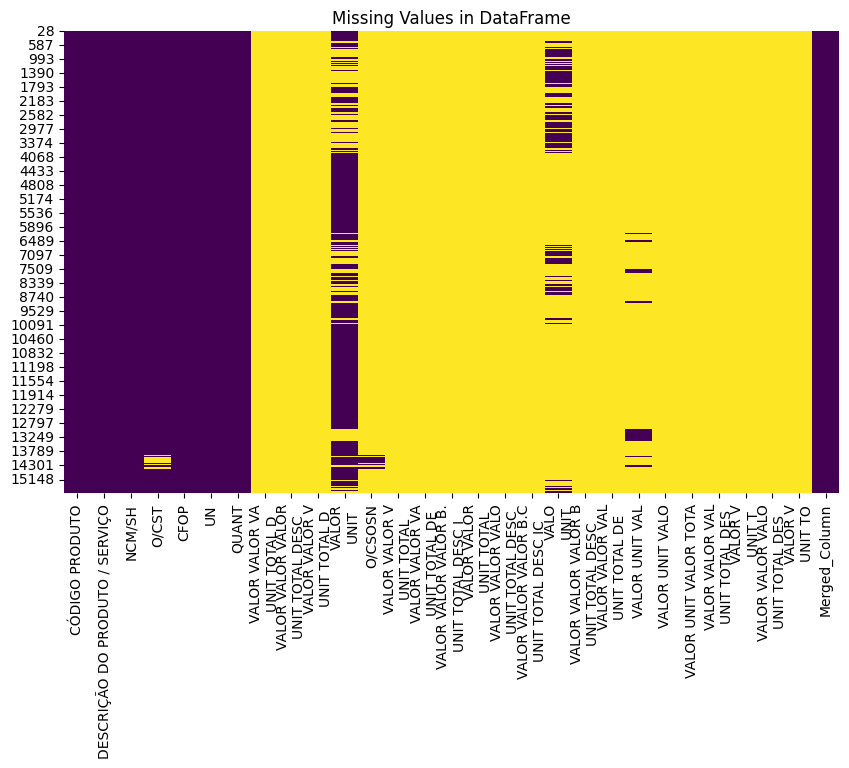

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in DataFrame')
plt.show()

In [45]:
# prompt: matrix of df_concat["merged_column] == Nan and

# Create a boolean matrix where True indicates NaN values in the 'Merged_Column'
nan_matrix = df_concat["Merged_Column"].isna()

# Display the boolean matrix
nan_matrix


0         True
1         True
2         True
3         True
4         True
         ...  
15638    False
15639    False
15640    False
15641    False
15642    False
Name: Merged_Column, Length: 14346, dtype: bool

In [48]:
# prompt: df == [nan_matrix]

df = df_concat[nan_matrix]
df


CÓDIGO PRODUTO                     DESCRIÇÃO DO PRODUTO / SERVIÇO  \
0              27609  0106.0D67.0016.048C CHINELO FEMININO\nSOLADO B...   
1              27611  0106.0D67.0016.048D CHINELO FEMININO\nSOLADO B...   
2              27588  0519.3279.0016.033A CHINELO FEMININO\nSOLADO P...   
3              27910  06FE.0D67.0016.00C4 CHINELO FEMININO\nSOLADO P...   
4              27912  06FE.0D67.0016.00DE CHINELO FEMININO\nSOLADO P...   
...              ...                                                ...   
15429  34082.33689.1  1 - BOLSA 28.23149A 5-VITON PRETO 53487\nUND\n...   
15430  34082.33690.1  1 - BOLSA 28.23149A 6-PRETO 53488 UND\n28.2314...   
15431  34313.33977.1  1 - BOLSA 28.23158A 1-MONTANA 53657 UND\n28.23...   
15432  34313.33925.1  1 - BOLSA 28.23158A 2-CRAFT / TONIC 53658\nUND...   
15433  34313.33926.1  1 - BOLSA 28.23158A 3-PRETO 53659 UND\n28.2315...   

         NCM/SH O/CST  CFOP  UN    QUANT  VALOR VALOR VA\nUNIT TOTAL D  \
0      64029990   000  6101  PR  12,0000                           NaN   
1      64029990   000  6101  PR  12,0000                           NaN   
2      64022000   000  6101  PR  12,0000                           NaN   
3      64022000   000  6101  PR  12,0000                           NaN   
4      64022000   000  6101  PR  12,0000                           NaN   
...         ...   ...   ...  ..      ...                           ...   
15429  42022210   000  6102  UN   2,0000                           NaN   
15430  42022210   000  6102  UN   2,0000                           NaN   
15431  42022210   000  6102  UN   1,0000                           NaN   
15432  42022210   000  6102  UN   1,0000                           NaN   
15433  42022210   000  6102  UN   2,0000                           NaN   

       VALOR VALOR VALOR\nUNIT TOTAL DESC  VALOR VALOR V\nUNIT TOTAL D  ...  \
0                                     NaN                          NaN  ...   
1                                     NaN                          NaN  ...   
2                                     NaN                          NaN  ...   
3                                     NaN                          NaN  ...   
4                                     NaN                          NaN  ...   
...                                   ...                          ...  ...   
15429                                 NaN                          NaN  ...   
15430                                 NaN                          NaN  ...   
15431                                 NaN                          NaN  ...   
15432                                 NaN                          NaN  ...   
15433                                 NaN                          NaN  ...   

       VALOR VALOR VALOR B\nUNIT TOTAL DESC  VALOR VALOR VAL\nUNIT TOTAL DE  \
0                                       NaN                             NaN   
1                                       NaN                             NaN   
2                                       NaN                             NaN   
3                                       NaN                             NaN   
4                                       NaN                             NaN   
...                                     ...                             ...   
15429                                   NaN                             NaN   
15430                                   NaN                             NaN   
15431                                   NaN                             NaN   
15432                                   NaN                             NaN   
15433                                   NaN                             NaN   

       VALOR UNIT VAL  VALOR UNIT VALO  VALOR UNIT VALOR TOTA  \
0                 NaN              NaN                    NaN   
1                 NaN              NaN                    NaN   
2                 NaN              NaN                    NaN   
3                 NaN              NaN                    

In [49]:
# prompt: with pd.option_context('display.max_rows', None, 'display.max_columns', None)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df)


CÓDIGO PRODUTO  \
0                        27609   
1                        27611   
2                        27588   
3                        27910   
4                        27912   
6                        01112   
7                        01167   
8                        27607   
9                        27608   
11                       01168   
12                       07109   
13                       05287   
14                       22422   
16                       27603   
17                       27604   
18                       11281   
20                       27599   
21                       27600   
22                       27601   
24                       27602   
25                       23648   
26                       27582   
64         0218.4384.0300.0001   
65         0218.4384.0300.0056   
66         032F.4328.0339.001D   
67         032F.4328.0339.0023   
68         045E.430D.03A0.0056   
69         045E.430D.03A0.01E9   
146                      01112   
147                      01167   
148                      01168   
149                      27607   
150                      27609   
151                      27611   
152                      28026   
154                      28027   
155                      28028   
156                      13976   
157                      13980   
159                      09229   
160                      07109   
161                      27806   
162                      28008   
163                      28016   
165                      27608   
166                      28007   
167                      28009   
168                      23629   
169                      28015   
170                      28017   
182        0452.3C4B.0065.0001   
183        0452.3C4B.0065.0057   
184        0452.3C4B.0065.0183   
185        0453.3C8D.0378.0001   
186        0453.3C8D.0378.0043   
187        0453.3C8D.0378.014F   
188        0453.3C8E.02CE.0001   
189        0453.3C8E.02CE.0043   
190        0453.3C8E.0378.0001   
191        0453.3C8E.0378.002B   
192        0453.3DF4.0065.0001   
193        0453.3DF4.0065.002B   
194        0453.3DF4.0065.00B3   
195        0470.4267.037C.00DB   
196        0470.4267.037C.010B   
197        0470.4267.037C.0133   
198        0470.4267.037C.02C4   
199        0470.4288.037C.003E   
200        0470.4288.037C.02C4   
201        0470.4288.0396.0001   
202        0470.4288.0396.004A   
203        0470.4288.0396.0080   
204        0470.4288.0396.03A4   
206        0450.4434.0378.0001   
207        0450.4434.0378.0080   
208        0450.4434.0378.01C2   
209        0450.4434.0396.0001   
210        0450.4434.0396.03A4   
211        0450.4434.0396.04BD   
212        0450.4434.0396.04BF   
213        0459.43F7.0378.0001   
214        0459.43F7.0378.0080   
215        0459.43F7.0378.00B9   
216        0459.44EA.0378.0001   
217        0459.4530.0396.0001   
218        0459.4530.0396.0477   
341               TRACK01-3813   
342               TRACK04-3722   
343                  SOFT-3060   
344                  SOFT-3062   
345                 MARTIN-576   
346                MARTIN-2755   
348                    UNO-576   
349                   UNO-2762   
350               PDV0121-8002   
351               PDV0123-8061   
353                      23620   
354                      19944   
355                      29934   
356                      13980   
357                      29205   
358                      29206   
360                      01112   
361                      01167   
362                      01168   
363                      27806   
365                      29972   
366                      13976   
388        0450.441E.0010.00AA   
389        0450.441E.0010.0210   
390        0450.441E.037C.001D   
391        0450.441E.037C.0023   
392        0450.441E.0396.0001   
393        0450.441E.0396.00D6   
394        0450.441E.0396.01AF   
395        0453.43F8.0378.0001   
396        0453.43F8.0378.0080   
397 

In [ ]:
# prompt: open df_concat['QUANT'] get the first char before ',' and save in new column "UN", its a objct AttributeError: Can only use .str accessor with string values!

# Convert the 'QUANT' column to strings
df_concat['QUANT'] = df_concat['QUANT'].astype(str)

# Extract the first character before the comma
df_concat['UN'] = df_concat['QUANT'].str.split(',').str[0]

# prompt: df_concat[VALOR\nUNIT 	VALO\nUNIT]  should be in a same new column and this column should have a flot vareble format to be use in excel in the future

# Combine 'VALOR\nUNIT' and 'VALO\nUNIT' columns into a new column 'Valor Unitário'
df_concat['Valor Unitário'] = df_concat['VALOR\nUNIT'].fillna(df_concat['VALO\nUNIT'])

# Remove the original columns


# Convert the new column to float
df_concat['Valor Unitário'] = pd.to_numeric(df_concat['Valor Unitário'].str.replace(',', '.'), errors='coerce')
df_concat


<ipython-input-66-37d8e1915e86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['QUANT'] = df_concat['QUANT'].astype(str)
<ipython-input-66-37d8e1915e86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['UN'] = df_concat['QUANT'].str.split(',').str[0]


In [ ]:
df_concat

CÓDIGO PRODUTO                     DESCRIÇÃO DO PRODUTO / SERVIÇO  \
0          24144389  SAPATO CASUAL MASC. DE USO COMUM C/\nSOLA SINT...   
1          24144391  SAPATO CASUAL MASC. DE USO COMUM C/\nSOLA SINT...   
2          24144393  SAPATO CASUAL MASC. DE USO COMUM C/\nSOLA SINT...   
4          24144395  SAPATO CASUAL MASC. DE USO COMUM C/\nSOLA SINT...   
5          24144397  SAPATO CASUAL MASC. DE USO COMUM C/\nSOLA SINT...   
..              ...                                                ...   
841  36300202598-32                           BOTA KIDY STYLE AVELA 32   
842  36300202598-33                           BOTA KIDY STYLE AVELA 33   
843  36300202598-34                           BOTA KIDY STYLE AVELA 34   
844  36300202598-35                           BOTA KIDY STYLE AVELA 35   
845  36300202598-36                           BOTA KIDY STYLE AVELA 36   

       NCM/SH O/CST  CFOP UN   QUANT VALOR\nUNIT VALO\nUNIT  Valor Unitário  
0    64041900   500  6101  1  1,0000     85,0900        NaN           85.09  
1    64041900   500  6101  2  2,0000     85,0900        NaN           85.09  
2    64041900   500  6101  3  3,0000     85,0900        NaN           85.09  
4    64041900   500  6101  3  3,0000         NaN       85,0           85.00  
5    64041900   500  6101  2  2,0000         NaN       85,0           85.00  
..        ...   ...   ... ..     ...         ...        ...             ...  
841  64029190   500  6101  1  1,0000         NaN      67,80           67.80  
842  64029190   500  6101  1  1,0000         NaN      67,80           67.80  
843  64029190   500  6101  2  2,0000         NaN      67,80           67.80  
844  64029190   500  6101  2  2,0000         NaN      67,80           67.80  
845  64029190   500  6101  2  2,0000         NaN      67,80           67.80  

[777 rows x 10 columns]

In [ ]:
# prompt: gets only the values that is a number on df_concat ["UN"] and transform it in int

# Filter the 'UN' column to keep only numeric values
df_concat['UN'] = df_concat['UN'][df_concat['UN'].str.isdigit()]

# Convert the 'UN' column to integers
df_concat['UN'] = df_concat['UN'].fillna(0).astype(int)


AttributeError: Can only use .str accessor with string values!

In [ ]:
# prompt: df_concat["UN"] * df_concat["Valor Unitário"] new colum valor total

df_concat["Valor Total"] = df_concat["UN"] * df_concat["Valor Unitário"]


<ipython-input-76-bef7ddf949d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Valor Total"] = df_concat["UN"] * df_concat["Valor Unitário"]


In [ ]:
# prompt: sum(df["Valor total]

df_concat["Valor Total"].sum()


76175.38